## <center><i><b>ETH</b>zürich</i></center> <center><i>Institute of Fluid Dynamics</i></center>  

# Fracture Displacement Basis Function Method
### Giulia Conti, Stephan Matthai, Patrick Jenny

This goal of this notebook is a demonstration of the fracture basis function approach - for efficient shear displacement and tensile opening modeling. Homogeneous 2D domains with isolated, predefined fractures are considered. Purpose of the scheme is efficient simulations of shear displacement and tensile opening induced by a specified far field stress field and fluid pressures in the individual fractures. At this point elliptic slip and opening profiles are assumed, that is, each fracture only has two degree of freedom. However, the concept is more general, i.e., this approach can be extended such that non-elliptic slip profiles can be described as for example needed for intersecting fractures.

#### Normailzed Fracture Basis Functions
For the shear normalized basis function, solve the force balance
$
\frac{\partial}{\partial x_j} \hat{\sigma}_{ij}= 0
$
for the displacement field $\bf{u}$
$
\textrm{on   }\mathbb{R}^2\textrm{ with } \\ \lim_{|\bf x|\rightarrow\infty}\hat{u}_i=0
\ \ \ \wedge\ \ \ 
\left(\hat{u}_1,\ \hat{u}_2\right)^T
\ =\ 
\left(\pm(0.5\sqrt{1-x_1^2/0.5^2}),\ 0\right)^T
\textrm{ for }
\left(x_1,x_2\right)^T\in\left([-0.5,0.5],\ \pm\epsilon\right)^T
\textrm{ with }0<\epsilon\ll 1
$

assuming linear elasticity
$
\hat{\sigma}_{ij}\ =\ 
\lambda\frac{\partial \hat{u}_k}{\partial x_k} \delta_{ij}
\ +\ 
G\left(\frac{\partial \hat{u}_j}{\partial x_i}+\frac{\partial \hat{u}_i}{\partial x_j}\right)
$

$
\Rightarrow  \frac{\partial}{\partial x_j}\left(
\lambda\frac{\partial \hat{u}_k}{\partial x_k} \delta_{ij}
\ +\ 
G\left(\frac{\partial \hat{u}_j}{\partial x_i}+\frac{\partial \hat{u}_i}{\partial x_j}\right)
\right)
\ =\ 0
$

The tensile opening basis function is calculated analogously. 

#### Specific Basis Functions
$
{\bf\hat{u}}^{f}({\bf x})\ =\ {\bf R}^{f}\ {\bf\hat{u}}({\bf G}^{f}({\bf x}-\bar{\bf x}^{f})/L^{f})
$

$
{\bf\hat{\sigma}}^{f}({\bf x})\ =\ {\bf R}^{f}\ {\bf\hat{\sigma}}({\bf G}^{f}({\bf x}-\bar{\bf x}^{f})/L^{f})\ {\bf G}^{f}
\ \ \ 
$
with
$
\ \ \ 
\bf R^f=\left(
\begin{array}{cc}
\cos(\alpha^f)&-\sin(\alpha^f)\\
\sin(\alpha^f)&\cos(\alpha^f)
\end{array}
\right)
\ \ \ 
$
and
$
\ \ \ 
\bf G^f=\left(
\begin{array}{cc}
\cos(\alpha^f)&\sin(\alpha^f)\\
-\sin(\alpha^f)&\cos(\alpha^f)
\end{array}
\right)
$

#### Normalized traction- and normal stresses induced by fracture f on fracture g:

$
{\bf {\hat\sigma}}_{t,n}^{f\rightarrow g} = \int_{\Omega^g} {\bf \hat\sigma}_{t,n}^{f}\ dL
\ \ \ 
$
and
$
\ \ \ 
{\bf {\sigma}}_{t,n}^{\infty\rightarrow g} = \int_{\Omega^g} {\bf \sigma}_{t,n}^{\infty}\ dL
$

#### Constraints to obtain a linear system for the shear displacement dofs $s_t^f$:

$
\Rightarrow\ \ \ \forall g\in\{1,..,n\}:\ \ \ 
\sum_{f=1}^n
  \left\{
  s_t^{f} 
    \left(
      \hat{\sigma}_t^{f\rightarrow g} + \mu^g \hat{\sigma}_n^{f\rightarrow g}
    \right)
  \right\}
  \ \le\ 
  \mu^g \left({\sigma}_n^{\infty\rightarrow g}\ -\ p^{g}L^{g}\right)\ -\ {\sigma}_t^{\infty\rightarrow g}
  \ \ \ 
$
(linear system for $s_t^f$)

#### Constraints to obtain a linear system for the dofs $s_t^f$ and $s_n^f$:
If tensile opening is present, there are two degrees of freedom per fracture: shear displacement $s_t$, and tensile opening $s_n$ . 

$
\Rightarrow\ \ \ \forall g\in\{1,..,n\}:\ \ \ 
$

$
\sum_{f=1}^n
  \left\{
  s_t^{f} \hat{\sigma}_{slip,t}^{f\rightarrow g} + s_n^{f} \hat{\sigma}_{open,t}^{f\rightarrow g}
  \right\}\
  =- {\sigma}_t^{\infty\rightarrow g}
  \ \ \ 
$
(linear system for $s_t^f$)

$
\sum_{f=1}^n
  \left\{
  s_t^{f} \hat{\sigma}_{slip,n}^{f\rightarrow g}+ s_n^{f} \hat{\sigma}_{open,n}^{f\rightarrow g}
  \right\}
  \ \le\ 
  p^{g} L^g
  \ -\ 
  {\sigma}_n^{\infty\rightarrow g}\
  \ \ \ 
$
(linear system for $s_n^f$)

#### Displacement- and stress fields induced by far field stress and N fractures

$
{\bf u}\ =\ \sum_{f=1}^N\{s_t^{f}{\hat{\bf u}}_{slip}^{f}+s_n^{f}{\hat{\bf u}}_{open}^{f}\}\ +\ {\bf u}^\infty
\ \ \ 
$
and
$
\ \ \ 
{\bf \sigma}\ =\ \sum_{f=1}^N\{s_t^{f}{\hat{\bf \sigma}}_{slip}^{f}+s_n^{f}{\hat{\bf \sigma}}_{open}^{f}\}\ +\ {\bf \sigma}^\infty
$

with far field displacement obtained from far field stress:
- given: $\sigma_{ij}^\infty$
- ansatz: $(u_1^\infty, u_2^\infty)^T\ =\ (a_{11}x_1\ +\ a_{12}x_2,\ a_{21}x_1\ +\ a_{22}x_2)^T$
- stress-strain relation: $\Rightarrow\ \ \ \lambda a_{kk}\delta_{ij}
\ +\ 
G\left(a_{ji}+a_{ij})\right)
\ =\ \sigma^\infty_{ij}\ \ \ $(linear system for $a_{ij}$)

### Code
Libraries

In [301]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython    import display as dsp
from ipywidgets import interact
import time
import scipy as sp

Parameters for computation of displacement basis function

In [ ]:
L       = 8      # domain size: [-L/2,L/2] x [-L/2,L/2]
nHalf   = 800      
n       = nHalf*2  # grid resoluton: (n x n)
nJacobi = 100000   # max. number of Jacobi iterations
tol     = 1e-6     # tolerance for stopping criterion of Jacobi method
epsilon = 1e-6     # tolerance for rounding error

Lame1   = 6.3      # Lamé's first  parameter 
Lame2   = 6.9      # Lamé's second parameter 

solverType = 0     # 0: Jacobi, 1: sparse solver
readBF     = 1     # 0: compute BF with solverType, 1: read BF

Defining and building the grid for computation of displacement basis function

In [284]:
# grid spacing
h = L/n

# grid for basis function calculation
x1              = h * (np.arange(n     +1)) - L/2  # x1 from -L/2 to L/2
x2Half          = h * (np.arange(nHalf +1))        # from 0 to L/2
x2              = h * (np.arange(n     +2)) - L/2  # +2 because two grid points at y=0 axis: upper and lower grid point of fracture
x2[nHalf+1:n+2] = h * (np.arange(nHalf +1))        # makes upper half from 0 to L/2, such that there are two 0.


X1Half , X2Half  = np.meshgrid(x1, x2Half)
X1     , X2      = np.meshgrid(x1, x2)

Definig the fields for the displacement basis functions

In [285]:
# fields
U1Half  = np.zeros((nHalf +1, n+1))     # horizontal displacement solution field (half)
U2Half  = np.zeros((nHalf +1, n+1))     # vertical   displacement solution field (half)
U1      = np.zeros((n     +2, n+1))     # horizontal displacement solution field (full)
U2      = np.zeros((n     +2, n+1))     # vertical   displacement solution field (full)


R1Half  = np.zeros((nHalf +1, n+1))     # horizontal residual field (half)
R2Half  = np.zeros((nHalf +1, n+1))     # vertical   residual field (half) 
Rmax    = np.zeros(nJacobi)             # max residual of every Jacobi iteration

Computation of displacement basis function, solve force balance with finite volume discretization scheme

In [ ]:
if (readBF==0):
    start = time.time()
    
    # boundary conditions (Dirichlet) 
    U1Half[ 0, 1:-1] = 0
    U1Half[-1, 1:-1] = 0
    U1Half[1:-1,  0] = 0
    U1Half[1:-1, -1] = 0
    
    U2Half[ 0, 1:-1] = 0
    U2Half[-1, 1:-1] = 0
    U2Half[1:-1,  0] = 0
    U2Half[1:-1, -1] = 0
    
    # elliptic profile with L_fracture=1
    for i in range(n): 
        if ((x1[i]>=-0.5) and (x1[i]<=0.5)): 
            U1Half[0,i] =  0.5*math.sqrt(1-x1[i]*x1[i]/0.5/0.5) 
          
    U2Half[0,nHalf] =  0

    # compute the solutions U1Half and U2Half
    iteration = 0
    
    # residual
    R1Half[1:-1,1:-1] = \
    ( 
        +( 3*Lame2+   Lame1)*(U1Half[0:-2,0:-2]+U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2]+U1Half[2:  ,2:  ])
        +(10*Lame2+ 6*Lame1)*(U1Half[1:-1,0:-2]+U1Half[1:-1,2:  ])
        +( 2*Lame2- 2*Lame1)*(U1Half[0:-2,1:-1]+U1Half[2:  ,1:-1])
        +( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,0:-2]+U2Half[2:  ,2:  ])
        -( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2])
        -(36*Lame2+12*Lame1)*(U1Half[1:-1,1:-1])
    )/8    
    R2Half[1:-1,1:-1] = \
    ( 
        +( 3*Lame2+   Lame1)*(U2Half[0:-2,0:-2]+U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2]+U2Half[2:  ,2:  ])
        +( 2*Lame2- 2*Lame1)*(U2Half[1:-1,0:-2]+U2Half[1:-1,2:  ])
        +(10*Lame2+ 6*Lame1)*(U2Half[0:-2,1:-1]+U2Half[2:  ,1:-1])
        +( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,0:-2]+U1Half[2:  ,2:  ])
        -( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2])
        -(36*Lame2+12*Lame1)*(U2Half[1:-1,1:-1])
    )/8   
   
    # Jacobi method 
    if (solverType==0):
        for k in range(nJacobi):
        
            # solution update
            U1Half[0:-1,1:-1] = R1Half[0:-1,1:-1]*8/(36*Lame2+12*Lame1)*0.5 + U1Half[0:-1, 1:-1]
            U2Half[0:-1,1:-1] = R2Half[0:-1,1:-1]*8/(36*Lame2+12*Lame1)*0.5 + U2Half[0:-1, 1:-1]
        
            # residual
            R1Half[1:-1,1:-1] = \
            ( 
                +( 3*Lame2+   Lame1)*(U1Half[0:-2,0:-2]+U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2]+U1Half[2:  ,2:  ])
                +(10*Lame2+ 6*Lame1)*(U1Half[1:-1,0:-2]+U1Half[1:-1,2:  ])
                +( 2*Lame2- 2*Lame1)*(U1Half[0:-2,1:-1]+U1Half[2:  ,1:-1])
                +( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,0:-2]+U2Half[2:  ,2:  ])
                -( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2])
                -(36*Lame2+12*Lame1)*(U1Half[1:-1,1:-1])
            )/8
            R2Half[1:-1,1:-1] = \
            ( 
                +( 3*Lame2+   Lame1)*(U2Half[0:-2,0:-2]+U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2]+U2Half[2:  ,2:  ])
                +( 2*Lame2- 2*Lame1)*(U2Half[1:-1,0:-2]+U2Half[1:-1,2:  ])
                +(10*Lame2+ 6*Lame1)*(U2Half[0:-2,1:-1]+U2Half[2:  ,1:-1])
                +( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,0:-2]+U1Half[2:  ,2:  ])
                -( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2])
                -(36*Lame2+12*Lame1)*(U2Half[1:-1,1:-1])
            )/8        
            for i in range(1,n): 
                R2Half[0,i] = \
                ( 
                    +( 3*Lame2+   Lame1)*(-U2Half[1,n-i+1]-U2Half[1,n-i-1]+U2Half[1,i-1]+U2Half[1,i+1])
                    +( 2*Lame2- 2*Lame1)*( U2Half[0,  i-1]+U2Half[0,  i+1])
                    +(10*Lame2+ 6*Lame1)*(-U2Half[1,n-i  ]+U2Half[1,  i  ])
                    +( 2*Lame2+ 2*Lame1)*(-U1Half[1,n-i+1]+U1Half[1,  i+1])
                    -( 2*Lame2+ 2*Lame1)*(-U1Half[1,n-i-1]+U1Half[1,  i-1])
                    -(36*Lame2+12*Lame1)*( U2Half[0,  i  ])
                )/8
        
            # max residual
            iteration += 1
            Rmax[iteration-1] = max(np.abs(R1Half).max(),np.abs(R2Half).max())
        
            # stopping criterion
            if Rmax[iteration-1] < tol: break
    
    # sparse solver
    if (solverType==1):
        # setup matrix
        numberCells = 2*(nHalf+1)*(n+1) # in y nhalf+1, in x n+1, 2* because displacement u and v 
        numberCellsUx = (nHalf+1)*(n+1)
        data    = np.zeros((numberCells*13)) 
        row_ind = np.zeros((numberCells*13))
        col_ind = np.zeros((numberCells*13)) 
        b       = np.zeros(numberCells)

        # boundaries 
        # southern boundary
        iteratorSparse = 0
        for j in range(0,n+1): 
            # ux = 0 on x axis outside of fracture
            data[iteratorSparse], row_ind[iteratorSparse] , col_ind[iteratorSparse]  = -(36*Lame2+12*Lame1), j, j
            if ((j*h-L/2 >=-0.5) and (j*h-L/2 <=0.5)):
                b[j] = 0.5*math.sqrt(1-(j*h-L/2)*(j*h-L/2)/0.5/0.5) * (-1)*(36*Lame2+12*Lame1)/8
            # uy: symmetry BC
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx, j+numberCellsUx

            data[iteratorSparse+2], row_ind[iteratorSparse+2] , col_ind[iteratorSparse+2]  = ( 2*Lame2- 2*Lame1), j+numberCellsUx, j+numberCellsUx-1
            data[iteratorSparse+3], row_ind[iteratorSparse+3] , col_ind[iteratorSparse+3]  = ( 2*Lame2- 2*Lame1),j+numberCellsUx,j+numberCellsUx+1
            data[iteratorSparse+4], row_ind[iteratorSparse+4] , col_ind[iteratorSparse+4]  = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx-1 + (n+1)
            data[iteratorSparse+5], row_ind[iteratorSparse+5] , col_ind[iteratorSparse+5]  = (10*Lame2+ 6*Lame1),j+numberCellsUx,j+numberCellsUx   + (n+1)
            data[iteratorSparse+6], row_ind[iteratorSparse+6] , col_ind[iteratorSparse+6]  = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx+1 + (n+1)
            data[iteratorSparse+7], row_ind[iteratorSparse+7] , col_ind[iteratorSparse+7]  = ( 3*Lame2+   Lame1)*(-1), j+numberCellsUx,-(j-1)+numberCellsUx + 2*(n+1)
            data[iteratorSparse+8], row_ind[iteratorSparse+8] , col_ind[iteratorSparse+8] = (10*Lame2+ 6*Lame1)*(-1), j+numberCellsUx,-(j)+numberCellsUx   + 2*(n+1)
            data[iteratorSparse+9], row_ind[iteratorSparse+9] , col_ind[iteratorSparse+9] = ( 3*Lame2+   Lame1)*(-1), j+numberCellsUx,-(j+1)+numberCellsUx + 2*(n+1)
            # influence ux
            data[iteratorSparse+10], row_ind[iteratorSparse+10] , col_ind[iteratorSparse+10] = -( 2*Lame2+ 2*Lame1), j+numberCellsUx,j-1 + (n+1)
            data[iteratorSparse+11], row_ind[iteratorSparse+11] , col_ind[iteratorSparse+11] =  ( 2*Lame2+ 2*Lame1), j+numberCellsUx,j+1 + (n+1)
            data[iteratorSparse+12], row_ind[iteratorSparse+12] , col_ind[iteratorSparse+12] =  ( 2*Lame2+ 2*Lame1)*(-1), j+numberCellsUx,-(j-1) + 2*(n+1)
            data[iteratorSparse+13], row_ind[iteratorSparse+13] , col_ind[iteratorSparse+13] = -( 2*Lame2+ 2*Lame1)*(-1), j+numberCellsUx,-(j+1) + 2*(n+1)
            iteratorSparse += 14

        # northern boundary: ux=0, uy=0
        for j in range(numberCellsUx-n,numberCellsUx): 
            data[iteratorSparse], row_ind[iteratorSparse] , col_ind[iteratorSparse]  = -(36*Lame2+12*Lame1), j, j
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx,j+numberCellsUx
            iteratorSparse += 2
            
           
        for j in range(n+1,numberCellsUx-n):
            # western and eastern boudnary: ux=0, uy=0 
            if j%(n+1)==0 or (j+1)%(n+1)==0: 
                yglobal = j
                data[iteratorSparse], row_ind[iteratorSparse] , col_ind[iteratorSparse]  = -(36*Lame2+12*Lame1), j, j
                data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx,j+numberCellsUx
                iteratorSparse += 2
                continue
                
            #if not at boundary:
            # ux direction
            data[iteratorSparse], row_ind[iteratorSparse] , col_ind[iteratorSparse]  = -(36*Lame2+12*Lame1), j, j
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = (10*Lame2+ 6*Lame1),j,j-1
            data[iteratorSparse+2], row_ind[iteratorSparse+2] , col_ind[iteratorSparse+2]  = (10*Lame2+ 6*Lame1),j,j+1
            data[iteratorSparse+3], row_ind[iteratorSparse+3] , col_ind[iteratorSparse+3]  = ( 3*Lame2+   Lame1),j,j-1 + (n+1)
            data[iteratorSparse+4], row_ind[iteratorSparse+4] , col_ind[iteratorSparse+4]  = ( 2*Lame2- 2*Lame1),j,j   + (n+1)
            data[iteratorSparse+5], row_ind[iteratorSparse+5] , col_ind[iteratorSparse+5]  = ( 3*Lame2+   Lame1),j,j+1 + (n+1)
            data[iteratorSparse+6], row_ind[iteratorSparse+6] , col_ind[iteratorSparse+6]  = ( 3*Lame2+   Lame1),j,j-1 - (n+1)
            data[iteratorSparse+7], row_ind[iteratorSparse+7] , col_ind[iteratorSparse+7]  = ( 2*Lame2- 2*Lame1),j,j   - (n+1)
            data[iteratorSparse+8], row_ind[iteratorSparse+8] , col_ind[iteratorSparse+8]  = ( 3*Lame2+   Lame1),j,j+1 - (n+1)
            # influence uy
            data[iteratorSparse+9], row_ind[iteratorSparse+9] , col_ind[iteratorSparse+9]  = -( 2*Lame2+ 2*Lame1),j,j-1 + (n+1)+numberCellsUx
            data[iteratorSparse+10], row_ind[iteratorSparse+10] , col_ind[iteratorSparse+10]  =  ( 2*Lame2+ 2*Lame1),j,j+1 + (n+1)+numberCellsUx
            data[iteratorSparse+11], row_ind[iteratorSparse+11] , col_ind[iteratorSparse+11]  =  ( 2*Lame2+ 2*Lame1),j,j-1 - (n+1)+numberCellsUx
            data[iteratorSparse+12], row_ind[iteratorSparse+12] , col_ind[iteratorSparse+12]  = -( 2*Lame2+ 2*Lame1),j,j+1 - (n+1)+numberCellsUx

            # uy direction
            data[iteratorSparse+13], row_ind[iteratorSparse+13] , col_ind[iteratorSparse+13] = -(36*Lame2+12*Lame1),j+numberCellsUx,j+numberCellsUx
            data[iteratorSparse+14], row_ind[iteratorSparse+14] , col_ind[iteratorSparse+14] = ( 2*Lame2- 2*Lame1),j+numberCellsUx,j+numberCellsUx-1
            data[iteratorSparse+15], row_ind[iteratorSparse+15] , col_ind[iteratorSparse+15] = ( 2*Lame2- 2*Lame1),j+numberCellsUx,j+numberCellsUx+1
            data[iteratorSparse+16], row_ind[iteratorSparse+16] , col_ind[iteratorSparse+16] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx-1 + (n+1)
            data[iteratorSparse+17], row_ind[iteratorSparse+17] , col_ind[iteratorSparse+17] = (10*Lame2+ 6*Lame1),j+numberCellsUx,j+numberCellsUx   + (n+1)
            data[iteratorSparse+18], row_ind[iteratorSparse+18] , col_ind[iteratorSparse+18] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx+1 + (n+1)
            data[iteratorSparse+19], row_ind[iteratorSparse+19] , col_ind[iteratorSparse+19] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx-1 - (n+1)
            data[iteratorSparse+20], row_ind[iteratorSparse+20] , col_ind[iteratorSparse+20] = (10*Lame2+ 6*Lame1),j+numberCellsUx,j+numberCellsUx   - (n+1)
            data[iteratorSparse+21], row_ind[iteratorSparse+21] , col_ind[iteratorSparse+21] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx+1 - (n+1)
            # influence ux
            data[iteratorSparse+22], row_ind[iteratorSparse+22] , col_ind[iteratorSparse+22] = -( 2*Lame2+ 2*Lame1),j+numberCellsUx,j-1 + (n+1)
            data[iteratorSparse+23], row_ind[iteratorSparse+23] , col_ind[iteratorSparse+23] =  ( 2*Lame2+ 2*Lame1),j+numberCellsUx,j+1 + (n+1)
            data[iteratorSparse+24], row_ind[iteratorSparse+24] , col_ind[iteratorSparse+24] =  ( 2*Lame2+ 2*Lame1),j+numberCellsUx,j-1 - (n+1)
            data[iteratorSparse+25], row_ind[iteratorSparse+25] , col_ind[iteratorSparse+25] = -( 2*Lame2+ 2*Lame1),j+numberCellsUx,j+1 - (n+1)
            iteratorSparse += 26
        data=data/8
        x0 = np.zeros(numberCells)
        sA = sp.sparse.csr_matrix((data, (row_ind, col_ind)), shape=(numberCells, numberCells))
        print(sA.data.nbytes,flush=True)
        print(b.data.nbytes,flush=True)
        U1Halfshape=sp.sparse.linalg.spsolve(sA, b) # sparse direct solver
  
        U1Half=np.reshape(U1Halfshape[0:numberCellsUx],(nHalf+1, n+1))
        U2Half=np.reshape(U1Halfshape[numberCellsUx:],(nHalf+1, n+1))

        np.allclose(sA.dot(U1Halfshape), b, atol=1e-03)

           
    # full solution fields (using anti-symmetry)
    U1[nHalf+1:   ,:]= U1Half
    U1[nHalf  ::-1,:]=-U1Half
    U2[nHalf+1:   ,:]= U2Half 
    U2[nHalf  ::-1,:]= U2Half 

    # Calculate the end time and time taken
    end = time.time()
    length = end - start
    print("It took", length, "seconds!")
    
    # summary output
    if (solverType == 0):
        print("total J-interations = ",iteration)
        print("Res                 = ",R1Half.max())
    
    # plotting solution
    fig = plt.figure(figsize=(20, 10))
    sf1 = fig.add_subplot(221)
    sf2 = fig.add_subplot(222)
    sf3 = fig.add_subplot(223)
    sf4 = fig.add_subplot(224)
    sf2.axis('scaled')
    sf3.axis('scaled')
    sf4.axis('scaled')
    font_size = 14
    
    sf1.clear()
    sf2.clear()
    sf3.clear()
    sf4.clear()
    
    sf1.plot(np.log(Rmax)/np.log(10))                               # plot Rmax        
    s2 = sf2.contourf(X1Half[:], X2Half, R1Half,200,cmap='inferno') # plot R1   
    plt.colorbar(s2)
    s3 = sf3.contourf(X1    [:], X2    , U1    ,200, cmap='inferno') # plot U1     
    plt.colorbar(s3)
    s4 = sf4.contourf(X1    [:], X2    , U2    ,200, cmap='inferno') # plot U2       
    plt.colorbar(s4)
    
    
    # plot settings
    sf1.set_title("log(max. residual)", fontsize=18)
    sf2.set_title("residual R1"       , fontsize=18)
    sf3.set_title("solution U1"       , fontsize=18)
    sf4.set_title("solution U2"       , fontsize=18)
    
    # plot
    dsp.display(plt.gcf())
    dsp.clear_output(wait=True)


In [ ]:
# read in BF  
if readBF==1:
    with open ("Data/U1_Nh800_L8.csv", 'rb') as FileToRead:
        U1=np.loadtxt(FileToRead, delimiter=",")
    FileToRead.close()
    # read in BF 
    with open ("Data/U2_Nh800_L8.csv", 'rb') as FileToRead:
        U2=np.loadtxt(FileToRead, delimiter=",")
    FileToRead.close()
    print(np.shape(U1))

(2002, 2001)


Defining fieds for the opening basis function

In [287]:
# fields
U1Half  = np.zeros((nHalf +1, n+1))     # horizontal displacement solution field (half)
U2Half  = np.zeros((nHalf +1, n+1))     # vertical   displacement solution field (half)
U1N      = np.zeros((n     +2, n+1))    # horizontal displacement solution field (full)
U2N      = np.zeros((n     +2, n+1))    # vertical   displacement solution field (full)

R1Half  = np.zeros((nHalf +1, n+1))     # residual field (half)
R2Half  = np.zeros((nHalf +1, n+1))     # residual field (half) 
Rmax    = np.zeros(nJacobi)             # max resitual of every Jacobi iteration

Computation of opening basis function. If we assume same profile shape as shear slip: same BF as shear slip but with exchanged U1 and U2 fields. 

In [288]:
# boundary conditions (Dirichlet)
if readBF==0:
    U1Half[ 0, 1:-1] = 0
    U1Half[-1, 1:-1] = 0
    U1Half[1:-1,  0] = 0
    U1Half[1:-1, -1] = 0
    
    U2Half[ 0, 1:-1] = 0
    U2Half[-1, 1:-1] = 0
    U2Half[1:-1,  0] = 0
    U2Half[1:-1, -1] = 0

    if (solverType==0):
        # at fracture boundary set parabolic slip BC
        for i in range(n): 
            if ((x1[i]>=-0.5) and (x1[i]<=0.5)): 
                U2Half[0,i] =  0.5*math.sqrt(1-x1[i]*x1[i]/0.5/0.5) # elliptic with L_fracture=1
                U1Half[0,i] =  0
        # compute the solutions U1Half and U2Half (with Jacobi method)
        iteration = 0
        
        # residual, set stencil: r11= -(u00+u02+u20+u22)+(u10+u12)+(u01+u21)+(v00+v22)-(v02+v20)-u11
        R1Half[1:-1,1:-1] = \
        ( 
            +( 3*Lame2+   Lame1)*(U1Half[0:-2,0:-2]+U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2]+U1Half[2:  ,2:  ])
            +(10*Lame2+ 6*Lame1)*(U1Half[1:-1,0:-2]+U1Half[1:-1,2:  ])
            +(2*Lame2 - 2*Lame1)*(U1Half[0:-2,1:-1]+U1Half[2:  ,1:-1])
            +( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,0:-2]+U2Half[2:  ,2:  ])
            -( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2])
            -(36*Lame2+12*Lame1)*(U1Half[1:-1,1:-1])
        )/8    
        R2Half[1:-1,1:-1] = \
        ( 
            +( 3*Lame2+   Lame1)*(U2Half[0:-2,0:-2]+U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2]+U2Half[2:  ,2:  ])
            +( 2*Lame2- 2*Lame1)*(U2Half[1:-1,0:-2]+U2Half[1:-1,2:  ])
            +(10*Lame2+ 6*Lame1)*(U2Half[0:-2,1:-1]+U2Half[2:  ,1:-1])
            +( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,0:-2]+U1Half[2:  ,2:  ])
            -( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2])
            -(36*Lame2+12*Lame1)*(U2Half[1:-1,1:-1])
        )/8     
        
        # Jacobi method loop
        for k in range(nJacobi):
        
            # solution update
            U1Half[0:-1,1:-1] = R1Half[0:-1,1:-1]*8/(36*Lame2+12*Lame1)*0.5 + U1Half[0:-1, 1:-1]
            U2Half[0:-1,1:-1] = R2Half[0:-1,1:-1]*8/(36*Lame2+12*Lame1)*0.5 + U2Half[0:-1, 1:-1]
        
            # residual
            R1Half[1:-1,1:-1] = \
            ( 
                +( 3*Lame2+   Lame1)*(U1Half[0:-2,0:-2]+U1Half[0:-2,2:  ] + U1Half[2:  ,0:-2]+U1Half[2:  ,2:  ])
                +(10*Lame2+ 6*Lame1)*(U1Half[1:-1,0:-2]+U1Half[1:-1,2:  ])
                +( 2*Lame2- 2*Lame1)*(U1Half[0:-2,1:-1]+U1Half[2:  ,1:-1])
                +( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,0:-2]+U2Half[2:  ,2:  ])
                -( 2*Lame2+ 2*Lame1)*(U2Half[0:-2,2:  ]+U2Half[2:  ,0:-2])
                -(36*Lame2+12*Lame1)*(U1Half[1:-1,1:-1])
            )/8
            R2Half[1:-1,1:-1] = \
            ( 
                +( 3*Lame2+   Lame1)*(U2Half[0:-2,0:-2]+U2Half[0:-2,2:  ] + U2Half[2:  ,0:-2]+U2Half[2:  ,2:  ])
                +( 2*Lame2- 2*Lame1)*(U2Half[1:-1,0:-2]+U2Half[1:-1,2:  ])
                +(10*Lame2+ 6*Lame1)*(U2Half[0:-2,1:-1]+U2Half[2:  ,1:-1])
                +( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,0:-2]+U1Half[2:  ,2:  ])
                -( 2*Lame2+ 2*Lame1)*(U1Half[0:-2,2:  ]+U1Half[2:  ,0:-2])
                -(36*Lame2+12*Lame1)*(U2Half[1:-1,1:-1])
            )/8        
           
            # displacement in x direction bound to 0 at y=0
            for i in range(1,n): 
                if ((x1[i]<-0.5) or (x1[i]>0.5)): 
                    R1Half[0,i] = \
                    ( 
                        +( 3*Lame2+   Lame1)*(-U1Half[1,n-i+1]-U1Half[1,n-i-1] + U1Half[1,i-1]+U1Half[1,i+1])
                        +(10*Lame2+ 6*Lame1)*( U1Half[0,  i-1]+U1Half[0,  i+1])
                        +( 2*Lame2- 2*Lame1)*(-U1Half[1,n-i  ]+U1Half[1,  i  ])
                        +( 2*Lame2+ 2*Lame1)*(-U2Half[1,n-i+1]+U2Half[1,  i+1])
                        -( 2*Lame2+ 2*Lame1)*(-U2Half[1,n-i-1]+U2Half[1,  i-1])
                        -(36*Lame2+12*Lame1)*( U1Half[0,  i  ])
                    )/8
            # max residual
            iteration += 1
            Rmax[iteration-1] = max(np.abs(R1Half).max(),np.abs(R2Half).max())
        
            # stopping criterion
            if Rmax[iteration-1] < tol: break


    if (solverType==1):
        # iterative sparse solver
        # setup matrix
        numberCells = 2*(nHalf+1)*(n+1) # in y nhalf+1, in x n+1, 2* becuase u and v displacement
        numberCellsUx = (nHalf+1)*(n+1)
        data    = np.zeros((numberCells*13)) 
        row_ind = np.zeros((numberCells*13))
        col_ind = np.zeros((numberCells*13)) 
        b       = np.zeros(numberCells)
    
        # boundaries
        # south boundary
        iteratorSparse = 0
        for j in range(0,n+1): 
            # west and east boudnary ux=0, uy=0
            if j==0 or j==n+1: 
                data[iteratorSparse],   row_ind[iteratorSparse] ,   col_ind[iteratorSparse]    = -(36*Lame2+12*Lame1), j, j
                data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx,j+numberCellsUx
                iteratorSparse += 2
                continue
            # uy: 0 outside fracture, ellipse at fracture
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx, j+numberCellsUx
            if ((j*h-L/2 >=-0.5) and (j*h-L/2 <=0.5)):
                b[j+numberCellsUx] = 0.5*math.sqrt(1-(j*h-L/2)*(j*h-L/2)/0.5/0.5) * (-1)*(36*Lame2+12*Lame1)/8
            # ux symmetry bc
            data[iteratorSparse], row_ind[iteratorSparse] , col_ind[iteratorSparse]  = -(36*Lame2+12*Lame1), j, j
            if ((j*h-L/2 <-0.5) and (j*h-L/2 >0.5)):
                # ux: symmetry ux einlfuss
                data[iteratorSparse+2], row_ind[iteratorSparse+2] , col_ind[iteratorSparse+2]  = (10*Lame2+ 6*Lame1), j, j-1
                data[iteratorSparse+3], row_ind[iteratorSparse+3] , col_ind[iteratorSparse+3]  = (10*Lame2+ 6*Lame1), j,j+1
                data[iteratorSparse+4], row_ind[iteratorSparse+4] , col_ind[iteratorSparse+4]  = ( 3*Lame2+   Lame1), j,j-1 + (n+1)
                data[iteratorSparse+5], row_ind[iteratorSparse+5] , col_ind[iteratorSparse+5]  = ( 2*Lame2- 2*Lame1), j,j   + (n+1)
                data[iteratorSparse+6], row_ind[iteratorSparse+6] , col_ind[iteratorSparse+6]  = ( 3*Lame2+   Lame1), j,j+1 + (n+1)
                data[iteratorSparse+7], row_ind[iteratorSparse+7] , col_ind[iteratorSparse+7]  = ( 3*Lame2+   Lame1)*(-1), j,-(j-1) + 2*(n+1)
                data[iteratorSparse+8], row_ind[iteratorSparse+8] , col_ind[iteratorSparse+8]  = ( 2*Lame2- 2*Lame1)*(-1), j,-(j)   + 2*(n+1)
                data[iteratorSparse+9], row_ind[iteratorSparse+9] , col_ind[iteratorSparse+9]  = ( 3*Lame2+   Lame1)*(-1), j,-(j+1) + 2*(n+1)
                # einfluss uy
                data[iteratorSparse+10], row_ind[iteratorSparse+10] , col_ind[iteratorSparse+10] = -( 2*Lame2+ 2*Lame1), j,j-1 +numberCellsUx+ (n+1)
                data[iteratorSparse+11], row_ind[iteratorSparse+11] , col_ind[iteratorSparse+11] =  ( 2*Lame2+ 2*Lame1), j,j+1 +numberCellsUx+ (n+1)
                data[iteratorSparse+12], row_ind[iteratorSparse+12] , col_ind[iteratorSparse+12] =  ( 2*Lame2+ 2*Lame1)*(-1), j,-(j-1) +numberCellsUx+ 2*(n+1)
                data[iteratorSparse+13], row_ind[iteratorSparse+13] , col_ind[iteratorSparse+13] = -( 2*Lame2+ 2*Lame1)*(-1), j,-(j+1) +numberCellsUx+ 2*(n+1)
                iteratorSparse += 14
            else :
                iteratorSparse += 2
    
        # north boundary: ux=0, uy=0
        for j in range(numberCellsUx-n,numberCellsUx): 
            data[iteratorSparse  ], row_ind[iteratorSparse] ,   col_ind[iteratorSparse]    = -(36*Lame2+12*Lame1), j, j
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx,j+numberCellsUx
            iteratorSparse += 2
            
        for j in range(n+1,numberCellsUx-n):
            # west and east boudnary ux=0, uy=0
            if j%(n+1)==0 or (j+1)%(n+1)==0: 
                yglobal = j
                data[iteratorSparse],   row_ind[iteratorSparse] ,   col_ind[iteratorSparse]    = -(36*Lame2+12*Lame1), j, j
                data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = -(36*Lame2+12*Lame1), j+numberCellsUx,j+numberCellsUx
                iteratorSparse += 2
                continue
                
            #if not boundary:
            # ux direction
            data[iteratorSparse],   row_ind[iteratorSparse] ,   col_ind[iteratorSparse]    = -(36*Lame2+12*Lame1), j, j
            data[iteratorSparse+1], row_ind[iteratorSparse+1] , col_ind[iteratorSparse+1]  = (10*Lame2+ 6*Lame1),j,j-1
            data[iteratorSparse+2], row_ind[iteratorSparse+2] , col_ind[iteratorSparse+2]  = (10*Lame2+ 6*Lame1),j,j+1
            data[iteratorSparse+3], row_ind[iteratorSparse+3] , col_ind[iteratorSparse+3]  = ( 3*Lame2+   Lame1),j,j-1 + (n+1)
            data[iteratorSparse+4], row_ind[iteratorSparse+4] , col_ind[iteratorSparse+4]  = ( 2*Lame2- 2*Lame1),j,j   + (n+1)
            data[iteratorSparse+5], row_ind[iteratorSparse+5] , col_ind[iteratorSparse+5]  = ( 3*Lame2+   Lame1),j,j+1 + (n+1)
            data[iteratorSparse+6], row_ind[iteratorSparse+6] , col_ind[iteratorSparse+6]  = ( 3*Lame2+   Lame1),j,j-1 - (n+1)
            data[iteratorSparse+7], row_ind[iteratorSparse+7] , col_ind[iteratorSparse+7]  = ( 2*Lame2- 2*Lame1),j,j   - (n+1)
            data[iteratorSparse+8], row_ind[iteratorSparse+8] , col_ind[iteratorSparse+8]  = ( 3*Lame2+   Lame1),j,j+1 - (n+1)
            # einfluss uy
            data[iteratorSparse+9], row_ind[iteratorSparse+9] , col_ind[iteratorSparse+9]     = -( 2*Lame2+ 2*Lame1),j,j-1 + (n+1)+numberCellsUx
            data[iteratorSparse+10], row_ind[iteratorSparse+10] , col_ind[iteratorSparse+10]  =  ( 2*Lame2+ 2*Lame1),j,j+1 + (n+1)+numberCellsUx
            data[iteratorSparse+11], row_ind[iteratorSparse+11] , col_ind[iteratorSparse+11]  =  ( 2*Lame2+ 2*Lame1),j,j-1 - (n+1)+numberCellsUx
            data[iteratorSparse+12], row_ind[iteratorSparse+12] , col_ind[iteratorSparse+12]  = -( 2*Lame2+ 2*Lame1),j,j+1 - (n+1)+numberCellsUx
    
            # uy direction
            data[iteratorSparse+13], row_ind[iteratorSparse+13] , col_ind[iteratorSparse+13] = -(36*Lame2+12*Lame1),j+numberCellsUx,j+numberCellsUx
            data[iteratorSparse+14], row_ind[iteratorSparse+14] , col_ind[iteratorSparse+14] = ( 2*Lame2- 2*Lame1),j+numberCellsUx,j+numberCellsUx-1
            data[iteratorSparse+15], row_ind[iteratorSparse+15] , col_ind[iteratorSparse+15] = ( 2*Lame2- 2*Lame1),j+numberCellsUx,j+numberCellsUx+1
            data[iteratorSparse+16], row_ind[iteratorSparse+16] , col_ind[iteratorSparse+16] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx-1 + (n+1)
            data[iteratorSparse+17], row_ind[iteratorSparse+17] , col_ind[iteratorSparse+17] = (10*Lame2+ 6*Lame1),j+numberCellsUx,j+numberCellsUx   + (n+1)
            data[iteratorSparse+18], row_ind[iteratorSparse+18] , col_ind[iteratorSparse+18] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx+1 + (n+1)
            data[iteratorSparse+19], row_ind[iteratorSparse+19] , col_ind[iteratorSparse+19] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx-1 - (n+1)
            data[iteratorSparse+20], row_ind[iteratorSparse+20] , col_ind[iteratorSparse+20] = (10*Lame2+ 6*Lame1),j+numberCellsUx,j+numberCellsUx   - (n+1)
            data[iteratorSparse+21], row_ind[iteratorSparse+21] , col_ind[iteratorSparse+21] = ( 3*Lame2+   Lame1),j+numberCellsUx,j+numberCellsUx+1 - (n+1)
            # einfluss ux
            data[iteratorSparse+22], row_ind[iteratorSparse+22] , col_ind[iteratorSparse+22] = -( 2*Lame2+ 2*Lame1),j+numberCellsUx,j-1 + (n+1)
            data[iteratorSparse+23], row_ind[iteratorSparse+23] , col_ind[iteratorSparse+23] =  ( 2*Lame2+ 2*Lame1),j+numberCellsUx,j+1 + (n+1)
            data[iteratorSparse+24], row_ind[iteratorSparse+24] , col_ind[iteratorSparse+24] =  ( 2*Lame2+ 2*Lame1),j+numberCellsUx,j-1 - (n+1)
            data[iteratorSparse+25], row_ind[iteratorSparse+25] , col_ind[iteratorSparse+25] = -( 2*Lame2+ 2*Lame1),j+numberCellsUx,j+1 - (n+1)
            iteratorSparse += 26
        data=data/8
        x0 = np.zeros(numberCells)
        sA = sp.sparse.csr_matrix((data, (row_ind, col_ind)), shape=(numberCells, numberCells))
        print(sA.data.nbytes,flush=True)
        print(b.data.nbytes,flush=True)
        U1Halfshape=sp.sparse.linalg.spsolve(sA, b) # sparse direct solver
        U1Half=np.reshape(U1Halfshape[0:numberCellsUx],(nHalf+1, n+1))
        U2Half=np.reshape(U1Halfshape[numberCellsUx: ],(nHalf+1, n+1))
    
            
    # full solution fields (using anti-symmetry)
    U1N[nHalf+1:   ,:]= U1Half
    U1N[nHalf  ::-1,:]= U1Half
    U2N[nHalf+1:   ,:]= U2Half
    U2N[nHalf  ::-1,:]= -U2Half
    
    
    # summary output
    print("total J-interations = ",iteration)
    print("Res                 = ",R1Half.max())
    
    # plotting solution
    fig = plt.figure(figsize=(20, 10))
    sf1 = fig.add_subplot(221)
    sf2 = fig.add_subplot(222)
    sf3 = fig.add_subplot(223)
    sf4 = fig.add_subplot(224)
    sf2.axis('scaled')
    sf3.axis('scaled')
    sf4.axis('scaled')
    font_size = 14
    
    sf1.clear()
    sf2.clear()
    sf3.clear()
    sf4.clear()
    
    sf1.plot(np.log(Rmax)/np.log(10))              # plot Rmax        
    s2 = sf2.contourf(X1Half[:], X2Half, R2Half,200,cmap='CMRmap') # plot R1      
    plt.colorbar(s2)
    s3 = sf3.contourf(X1    [:], X2    , U1N    ,200,cmap='CMRmap') # plot U1    
    plt.colorbar(s3)
    s4 = sf4.contourf(X1    [:], X2    , U2N    ,200,cmap='CMRmap') # plot U2  
    plt.colorbar(s4)
    
    
    # plot settings
    sf1.set_title("log(max. residual)", fontsize=18)
    sf2.set_title("residual R2"       , fontsize=18)
    sf3.set_title("solution U1N"       , fontsize=18)
    sf4.set_title("solution U2N"       , fontsize=18)
    
    # plot
    dsp.display(plt.gcf())
    dsp.clear_output(wait=True)

In [ ]:
# read BF for shear
if readBF==1:
    with open ("Data/U1N_Nh800_L8.csv", 'rb') as FileToRead:
        U1=np.loadtxt(FileToRead, delimiter=",")
    FileToRead.close()
    # read in BF 
    with open ("Data/U2N_Nh800_L8.csv", 'rb') as FileToRead:
        U2=np.loadtxt(FileToRead, delimiter=",")
    FileToRead.close()
    print(np.shape(U1))

Get segment in a unit square. find start and end coordinates in grid cell where grid cell is a unit square. 

In [ ]:
def getSegment(x1Local,x2Local,alphaLocal):
    epsilonFloat = 1e-9  # Tolerance for floating point comparisons
    if abs(alphaLocal - np.pi/2) < 0.01:  # 0.6 degree
        x1b = x1Local
        x2b = 0
        x1e = x1b
        x2e = 1
    else:
        if abs(alphaLocal) < epsilonFloat:
            x1b = 0
            x2b = x2Local
            x1e = 1
            x2e = x2b
        else:
            tana=np.tan(alphaLocal)
            # segment starts in middle of cell and has positive slope
            if x1Local>0 and x2Local/x1Local <= tana:
                x1b = x1Local - x2Local/tana
                x2b = 0
            else: 
                # segment starts in middle of cell and has negative slope
                if x1Local>0 and abs(x2Local)>epsilonFloat and (1-x2Local)/x1Local <= -tana:
                    x1b = x1Local + (1-x2Local)/tana
                    x2b = 1
                # segment starts in middle of cell but slope small enough that cuts left side of cell. for positive and negative slope
                else:
                    x1b = 0
                    x2b = x2Local - x1Local*tana

            # find coordinates of segment end point. 
            # positive slope, segment starts in middle of cell, and cutting upper part of cell, or if segment starts on the left cell boundary and cuts upper side.
            if x1Local<1 and (1-x2Local)/(1-x1Local) <= tana:
                x1e = x1Local + (1-x2Local)/tana
                x2e = 1
            # negative slope, segment ends at lower grid boundary
            else: 
                if x1Local<1 and abs(x2Local)>epsilonFloat and x2Local/(1-x1Local) <= -tana:
                    x1e = x1Local - x2Local/tana 
                    x2e = 0
                #segment ends at right cell boudnary
                else:
                    x1e = 1
                    x2e = x2Local + (1-x1Local)*tana

    return x1b, x2b, x1e, x2e

Interpolate displacement in basis function domain. Needed for illustration of results. Bilinear interpolation; x1 and x2 are coordinates in BF domain, mapped from problem domain (PD): $x1_{BF}=\frac{x1_{PD}-x^f_{PD}}{L^f}\cos\alpha^f + \frac{x2_{PD}-x2^f_{PD}}{L^f}\sin\alpha^f$

In [31]:
def getDisplacement(x1,x2,U1Field,U2Field):
    i1 = int((x1+L/2)/h)       #index in BF domain
    i2 = int((x2+L/2)/h)
    x1Local = n/2 + x1/h - i1  #local coord of grid cell. Needed for interpolation between grid points
    x2Local = n/2 + x2/h - i2
    if x2 >= 0: i2 += 1        #correction because U1 & U2 have coordinates of x2:[-L to 0, 0 to L]

    #interpolated displacements
    u1=(
        U1Field[i2  ,i1  ] * (1-x2Local) *(1-x1Local) +
        U1Field[i2  ,i1+1] * (1-x2Local) *(  x1Local) +
        U1Field[i2+1,i1  ] * (  x2Local) *(1-x1Local) +
        U1Field[i2+1,i1+1] * (  x2Local) *(  x1Local) 
    )
    u2=(
        U2Field[i2  ,i1  ] * (1-x2Local) *(1-x1Local) +
        U2Field[i2  ,i1+1] * (1-x2Local) *(  x1Local) +
        U2Field[i2+1,i1  ] * (  x2Local) *(1-x1Local) +
        U2Field[i2+1,i1+1] * (  x2Local) *(  x1Local) 
    )

    return u1,u2

Interpolated stress in basis function domain. Stress calclualted at location x1, x2. This function is needed for plotting the stress field.

In [32]:
def getStress(x1,x2,U1Field,U2Field):
    i1 = int((x1+L/2)/h)
    i2 = int((x2+L/2)/h)
    x1Local = n/2 + x1/h - i1 #location of mapped point (mapped from problem domain to BF domain), local grid cell coordinate 
    x2Local = n/2 + x2/h - i2
    if x2 >= 0: i2 += 1

    #interpolated stress
    du1_dx1=(
        U1Field[i2  ,i1  ] * (1-x2Local) *(-1) +
        U1Field[i2  ,i1+1] * (1-x2Local) *( 1) +
        U1Field[i2+1,i1  ] * (  x2Local) *(-1) +
        U1Field[i2+1,i1+1] * (  x2Local) *( 1) 
    )/h
    du2_dx1=(
        U2Field[i2  ,i1  ] * (1-x2Local) *(-1) +
        U2Field[i2  ,i1+1] * (1-x2Local) *( 1) +
        U2Field[i2+1,i1  ] * (  x2Local) *(-1) +
        U2Field[i2+1,i1+1] * (  x2Local) *( 1) 
    )/h
    du1_dx2=(
        U1Field[i2  ,i1  ] * (-1) *(1-x1Local) +
        U1Field[i2  ,i1+1] * (-1) *(  x1Local) +
        U1Field[i2+1,i1  ] * ( 1) *(1-x1Local) +
        U1Field[i2+1,i1+1] * ( 1) *(  x1Local) 
    )/h
    du2_dx2=(
        U2Field[i2  ,i1  ] * (-1) *(1-x1Local) +
        U2Field[i2  ,i1+1] * (-1) *(  x1Local) +
        U2Field[i2+1,i1  ] * ( 1) *(1-x1Local) +
        U2Field[i2+1,i1+1] * ( 1) *(  x1Local) 
    )/h
    tmp = Lame1*(du1_dx1 + du2_dx2)
    s11 = tmp + Lame2*(du1_dx1)*2        
    s22 = tmp + Lame2*(du2_dx2)*2        
    s12 =       Lame2*(du1_dx2 + du2_dx1)

    return s11, s22, s12

Get compressive and shear forces on segment in basis function domain. In other words: calculates force imposed by fracture f on the segment of fracture g \
x1, x2: starting coordinates of segment (segments of fracture g) in BF domain (of fracture f). \
alpha:  angle of segment (of fracture g) in BF domain (of fracture f). \
length: remaining length of fracture g where the force has not yet been calculated.

In [106]:
def getForceOnSegment(x1,x2,alpha,length,U1Field,U2Field):
    i1 = int((x1+L/2)/h)
    i2 = int((x2+L/2)/h)
    x1Local = n/2 + x1/h - i1 
    x2Local = n/2 + x2/h - i2
    if x2 >= 0: i2 += 1

    #start and end point of segment (local coordinates in grid cell)
    (x1b,x2b,x1e,x2e) = getSegment(x1Local,x2Local,alpha)
    
    #check if fracture starts in middle of cell. If yes: fracture is extended to grid cell boundary
    if np.sqrt((x1Local-x1b)**2 + (x2Local-x2b)**2) > epsilon:
        x1b = x1Local
        x2b = x2Local
    
    dx1 = x1e - x1b
    dx2 = x2e - x2b 
    s   = np.sqrt(dx1**2 + dx2**2)
    
    # catch last segment: correction of end point 
    if s > length/h:
        dx1 *= length/s/h
        dx2 *= length/s/h
        x1e  = x1b + dx1
        x2e  = x2b + dx2
        s    = np.sqrt(dx1**2 + dx2**2)

    if s==0 :
        print("error, s=0, check if two fractures start at same point")
        
        
    sina = dx2/s 
    cosa = dx1/s
        
    # integrated strains   
    if (sina == 0):
        # multiplied by dx1 since segment length=dx1
        int_du1_dx1=(
            U1Field[i2  ,i1  ] * (1-x2Local) *(-1) +
            U1Field[i2  ,i1+1] * (1-x2Local) *( 1) +
            U1Field[i2+1,i1  ] * (  x2Local) *(-1) +
            U1Field[i2+1,i1+1] * (  x2Local) *( 1) 
        )*dx1
        int_du2_dx1=(
            U2Field[i2  ,i1  ] * (1-x2Local) *(-1) +
            U2Field[i2  ,i1+1] * (1-x2Local) *( 1) +
            U2Field[i2+1,i1  ] * (  x2Local) *(-1) +
            U2Field[i2+1,i1+1] * (  x2Local) *( 1) 
        )*dx1
    else:
        # Interpolation with (1-midpoint) where midpoint=(x2e+x2b)/2*(x2e-x2b)/dx2
        # strain is calcualted and multiplied by segment length s to get the force. 
        int_du1_dx1=(
            U1Field[i2  ,i1  ] * (dx2 - (x2e**2-x2b**2)/2) *(-1) +
            U1Field[i2  ,i1+1] * (dx2 - (x2e**2-x2b**2)/2) *( 1) +
            U1Field[i2+1,i1  ] * (      (x2e**2-x2b**2)/2) *(-1) +
            U1Field[i2+1,i1+1] * (      (x2e**2-x2b**2)/2) *( 1) 
        )/sina
        int_du2_dx1=(
            U2Field[i2  ,i1  ] * (dx2 - (x2e**2-x2b**2)/2) *(-1) +
            U2Field[i2  ,i1+1] * (dx2 - (x2e**2-x2b**2)/2) *( 1) +
            U2Field[i2+1,i1  ] * (      (x2e**2-x2b**2)/2) *(-1) +
            U2Field[i2+1,i1+1] * (      (x2e**2-x2b**2)/2) *( 1) 
        )/sina
    if (cosa == 0):
        int_du1_dx2=(
            U1Field[i2  ,i1  ] * (-1) *(1-x1Local) +
            U1Field[i2  ,i1+1] * (-1) *(  x1Local) +
            U1Field[i2+1,i1  ] * ( 1) *(1-x1Local) +
            U1Field[i2+1,i1+1] * ( 1) *(  x1Local) 
        )*dx2
        int_du2_dx2=(
            U2Field[i2  ,i1  ] * (-1) *(1-x1Local) +
            U2Field[i2  ,i1+1] * (-1) *(  x1Local) +
            U2Field[i2+1,i1  ] * ( 1) *(1-x1Local) +
            U2Field[i2+1,i1+1] * ( 1) *(  x1Local) 
        )*dx2
    else:
        int_du1_dx2= (
            U1Field[i2  ,i1  ] * (-1) *(dx1 - (x1e**2-x1b**2)/2) +
            U1Field[i2  ,i1+1] * (-1) *(      (x1e**2-x1b**2)/2) +
            U1Field[i2+1,i1  ] * ( 1) *(dx1 - (x1e**2-x1b**2)/2) +
            U1Field[i2+1,i1+1] * ( 1) *(      (x1e**2-x1b**2)/2) 
        )/cosa
        int_du2_dx2=(
            U2Field[i2  ,i1  ] * (-1) *(dx1 - (x1e**2-x1b**2)/2) +
            U2Field[i2  ,i1+1] * (-1) *(      (x1e**2-x1b**2)/2) +
            U2Field[i2+1,i1  ] * ( 1) *(dx1 - (x1e**2-x1b**2)/2) +
            U2Field[i2+1,i1+1] * ( 1) *(      (x1e**2-x1b**2)/2) 
        )/cosa
        
    n1 = -dx2/s
    n2 =  dx1/s
        
    s11 = Lame1*(int_du1_dx1 + int_du2_dx2) + Lame2*(int_du1_dx1)*2 
    s22 = Lame1*(int_du1_dx1 + int_du2_dx2) + Lame2*(int_du2_dx2)*2 
    s12 =                                     Lame2*(int_du1_dx2 + int_du2_dx1)
    
    # starting coordinates of next segment
    x1end = (i1-n/2 + (x1b + 1.000001*dx1))*h
    x2end = (i2-n/2 + (x2b + 1.000001*dx2))*h 
    
    # correct back from line 6. correction of coordinate since values of U1 and U2 go from [-nhalf,0], [0,nhalf] in x2 direction
    if i2>nHalf: x2end -= h
    
    # sigma*n
    f1 = s11*n1 + s12*n2 
    f2 = s12*n1 + s22*n2
    
    # fc = n*(sigma*n) , ft = t*(sigma*n), x1end & x2end are coordinates in basis function domain. 
    return f1*n1+f2*n2, f1*n2-f2*n1, x1end, x2end, length - s*h

Check if point x1,x2 is in basis function domain

In [18]:
def inDomain(x1,x2): return (abs(x1)<L/2 and abs(x2)<L/2)

Compute force integral along a line with x1b,x2b,x1e,x2e in basis function domain. 

In [44]:
def getForceOnLine (x1b,x2b,x1e,x2e,U1Field,U2Field):  
    n1     = x2b-x2e
    n2     = x1e-x1b
    length = np.sqrt(n1**2 + n2**2)
    n1 /= length
    n2 /= length
    x1 = x1b
    x2 = x2b
    
    alpha = np.pi/2
    if abs(x1e - x1b)>1e-9: alpha = np.arctan((x2e-x2b)/(x1e-x1b)) # alpha [-pi/2,pi/2] 
      
    # change start point or end point if they are outside of basis function domain, and adapt length.
    if (not inDomain(x1,x2)):
        if  ((x1  >=  L/2)                or 
             (x1e <= -L/2)                or 
             (x2e <= -L/2 and alpha >= 0) or 
             (x2e >=  L/2 and alpha <= 0) or
             (x2  <= -L/2 and alpha <= 0) or
             (x2  >=  L/2 and alpha >= 0)
            ):
            length = 0        
        else:
            if (x1  <  -L/2):
                x1  =  -L/2
                x2 -=  (x1+L/2)*np.tan(alpha)    # x2 = x2 + (-x1 - L/2)*tana
            if (x2  <= -L/2 and alpha > 0):
                x2  =  -L/2
                x1 -=  (x2+L/2)/np.tan(alpha)    # x1 = x1 + (-x2-L/2)/tana
            if (x2 >=   L/2 and alpha < 0):
                x2  =   L/2
                x1 +=  (x2-L/2)/(-np.tan(alpha)) # x1 = x1 + (x2-L/2)/(-tana)
            n1      = x2 -x2e
            n2      = x1e-x1
            length  = np.sqrt(n1**2 + n2**2)
            n1     /= length
            n2     /= length

    Fc = 0
    Ft = 0
    while (length > epsilon):
        if inDomain(x1,x2):
            (fc,ft,x1,x2,length) = getForceOnSegment(x1,x2,alpha,length,U1Field,U2Field)
            Fc += fc
            Ft += ft
        else:
            x1 = x1e
            x2 = x2e
            length = 0
    
    return Fc, Ft

Compute influence coefficients between two fractures. Influence of fracture f (_s) on g (_a). Hence, fracture g is translated into the basis function domain of fracture f and the forced imposed on fracture g is calculated.

In [41]:
def coeff(x1_s,x2_s,length_s,alpha_s,x1_a,x2_a,length_a,alpha_a,U1Field,U2Field):
    x1     = (x1_a - x1_s)/length_s 
    x2     = (x2_a - x2_s)/length_s
    length = length_a/length_s
    alpha  = alpha_a - alpha_s
    tmp    =  np.cos(alpha_s)*x1 + np.sin(alpha_s)*x2
    x2     = -np.sin(alpha_s)*x1 + np.cos(alpha_s)*x2
    x1     = tmp
    
    dx1 = length*np.cos(alpha) 
    dx2 = length*np.sin(alpha)
 
    return getForceOnLine (x1-dx1/2,x2-dx2/2,x1+dx1/2,x2+dx2/2,U1Field,U2Field)


Specify fractures in problem domain

In [ ]:
L_Domain    = 4.0    # domain size 
n_Domain    = 400    # only affecting rendering of resulting displacement and stress fields
n_fractures = 33     # number of fractures in the domain
x1_Domain   = -L_Domain/2 + (np.arange(n_Domain+1))*L_Domain/n_Domain
x2_Domain   = -L_Domain/2 + (np.arange(n_Domain+1))*L_Domain/n_Domain

readfromFile = 1     # 0: fractures defined here, 1: fractures read from file

if readfromFile == 1:
    # format of file: [Length, midpoint x coord, midpoint y coord, fracture angle in rad relative to x-axis]
    File_data = np.loadtxt("Data/Odling33.txt", dtype=float) 
    print('n_fractures new: ', File_data[:,1].size)
    n_fractures = File_data[:,1].size

X1_Domain, X2_Domain  = np.meshgrid(x1_Domain, x2_Domain)

U1_Domain  = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
U2_Domain  = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S11_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S22_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S12_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))

U1N_Domain  = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
U2N_Domain  = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S11N_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S22N_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))
S12N_Domain = np.zeros((n_fractures,n_Domain+1,n_Domain+1))

U1_Domain_sum  = np.zeros((n_Domain+1,n_Domain+1))
U2_Domain_sum  = np.zeros((n_Domain+1,n_Domain+1))
S11_Domain_sum = np.zeros((n_Domain+1,n_Domain+1))
S22_Domain_sum = np.zeros((n_Domain+1,n_Domain+1))
S12_Domain_sum = np.zeros((n_Domain+1,n_Domain+1))
Smean_Domain_sum = np.zeros((n_Domain+1,n_Domain+1))

influence_c   = np.zeros((n_fractures,n_fractures))
influence_t   = np.zeros((n_fractures,n_fractures))
influenceTO_c = np.zeros((n_fractures,n_fractures))
influenceTO_t = np.zeros((n_fractures,n_fractures))

fracture_x1       = np.zeros(n_fractures)
fracture_x2       = np.zeros(n_fractures)
fracture_length   = np.zeros(n_fractures)
fracture_alpha    = np.zeros(n_fractures)
fracture_slip     = np.zeros(n_fractures)
fracture_opening  = np.zeros(n_fractures)
fracture_fc       = np.zeros(n_fractures)
fracture_ft       = np.zeros(n_fractures)

sign_correction = np.zeros(n_fractures)
check_outer_it  = 0
check_inner_it  = 0


if readfromFile == 0 :
    # Single and fracture 1 of Parallel test cases in paper
    fracture_x1    [0] =  0
    fracture_x2    [0] =  0
    fracture_length[0] =  0.5137
    fracture_alpha [0] =  np.pi/6
    
    if n_fractures==2: 
        #parallel fractures as in paper
        fracture_x1    [1] =  -0.2 # -0.2 for close parallel fractures, 0.1 for parallel fractures
        fracture_x2    [1] =  -0.2 
        fracture_length[1] =  0.515
        fracture_alpha [1] =  0.3138

        #intersection für paper
        # fracture_x1    [0] =  0.0
        # fracture_x2    [0] =  0.02
        # fracture_length[0] =  0.9652
        # fracture_alpha [0] =  0.5937
        # fracture_x1    [1] =  0.025
        # fracture_x2    [1] =  0.025
        # fracture_length[1] =  0.8581 #0.8515
        # fracture_alpha [1] =  -0.8685
        
    if n_fractures==3: 
        #example of 3 fractures
        fracture_x1    [0],fracture_x2    [0],fracture_length[0], fracture_alpha [0] =  0. , 0. , 0.5,np.pi/6
        fracture_x1    [1],fracture_x2    [1],fracture_length[1], fracture_alpha [1] = -0.3,-0.25, 0.5,np.pi/6 
        fracture_x1    [2],fracture_x2    [2],fracture_length[2], fracture_alpha [2] =  0.3, 0.25, 0.5, np.pi/6
    

# Note 1: if alpha=pi/2 or 0: will be corrected to 89.95 degrees or 0.06 degrees
# Note 2: make sure that you have no double fractures or fractures laying exactly over each other
# Note 3: /1000-0.4 is specific to the Odling.txt cases. Adapat as needed. _x1,_x2, and _length need to have same unit as L_domain.
if readfromFile==1:
    for i in range(n_fractures):   
        fracture_x1[i], fracture_x2[i], fracture_length[i], fracture_alpha[i] =  File_data[i,1]/1000-0.4, File_data[i,2]/1000-0.4, File_data[i,0]/1000, File_data[i,3]


n_fractures new:  33


Compute basis functions on problem domain, needed for rendering of results (displacement and stress)

In [323]:
for i_fracture in range(n_fractures):
    for i1 in range(n_Domain+1):
        for i2 in range(n_Domain+1):
            x1      = X1_Domain[i1,i2] 
            x2      = X2_Domain[i1,i2]
            
            # coordinates (x1Local, x2Local) in BF domain
            x1Local = (x1-fracture_x1[i_fracture])/fracture_length[i_fracture] 
            x2Local = (x2-fracture_x2[i_fracture])/fracture_length[i_fracture]

            # correction for vertical and horizontal fractures, corrected to 89.95degrees or 0.06 degrees: because of numerical reasons
            if fracture_alpha[i_fracture] == np.pi/2: fracture_alpha[i_fracture] = np.pi/2.001
            if fracture_alpha[i_fracture] == 0: fracture_alpha[i_fracture] = 0.001

            tmp     =  np.cos(fracture_alpha[i_fracture])*x1Local + np.sin(fracture_alpha[i_fracture])*x2Local
            x2Local = -np.sin(fracture_alpha[i_fracture])*x1Local + np.cos(fracture_alpha[i_fracture])*x2Local
            x1Local =  tmp

            u1  = 0
            u2  = 0
            s11 = 0
            s22 = 0
            s12 = 0
            if inDomain(x1Local,x2Local): 
                (u1 ,u2     ) = getDisplacement(x1Local,x2Local,U1,U2)
                (s11,s22,s12) = getStress      (x1Local,x2Local,U1,U2)
                
            cc = np.cos(fracture_alpha[i_fracture])**2
            ss = np.sin(fracture_alpha[i_fracture])**2
            cs = np.sin(fracture_alpha[i_fracture])*np.cos(fracture_alpha[i_fracture])
                                            
            U1_Domain [i_fracture,i1,i2] = np.cos(fracture_alpha[i_fracture])*u1  - np.sin(fracture_alpha[i_fracture])*u2
            U2_Domain [i_fracture,i1,i2] = np.sin(fracture_alpha[i_fracture])*u1  + np.cos(fracture_alpha[i_fracture])*u2     
            
            S11_Domain[i_fracture,i1,i2] = s11*cc + s22*ss - s12*cs*2 
            S22_Domain[i_fracture,i1,i2] = s11*ss + s22*cc + s12*cs*2
            S12_Domain[i_fracture,i1,i2] = (s11-s22)*cs + s12*(cc-ss)
            

            u1  = 0
            u2  = 0
            s11 = 0
            s22 = 0
            s12 = 0
            if inDomain(x1Local,x2Local): 
                (u1 ,u2     ) = getDisplacement(x1Local,x2Local,U1N,U2N)
                (s11,s22,s12) = getStress      (x1Local,x2Local,U1N,U2N)
                                            
            U1N_Domain [i_fracture,i1,i2] = np.cos(fracture_alpha[i_fracture])*u1  - np.sin(fracture_alpha[i_fracture])*u2
            U2N_Domain [i_fracture,i1,i2] = np.sin(fracture_alpha[i_fracture])*u1  + np.cos(fracture_alpha[i_fracture])*u2
            
            S11N_Domain[i_fracture,i1,i2] = s11*cc + s22*ss - s12*cs*2
            S22N_Domain[i_fracture,i1,i2] = s11*ss + s22*cc + s12*cs*2
            S12N_Domain[i_fracture,i1,i2] = (s11-s22)*cs + s12*(cc-ss)
            

Compute influence of fractures i on fracture j. 

In [324]:
for i in range(n_fractures):
    for j in range(n_fractures):
        # influcence of shear basis function
        (influence_c[i,j],influence_t[i,j]) = \
        coeff(
            fracture_x1[i],fracture_x2[i],fracture_length[i],fracture_alpha[i],
            fracture_x1[j],fracture_x2[j],fracture_length[j],fracture_alpha[j],
            U1,U2
        )

        # influence of tensile opening basis function
        (influenceTO_c[i,j],influenceTO_t[i,j]) = \
        coeff(
            fracture_x1[i],fracture_x2[i],fracture_length[i],fracture_alpha[i],
            fracture_x1[j],fracture_x2[j],fracture_length[j],fracture_alpha[j],
            U1N,U2N
        )


Interactive animation

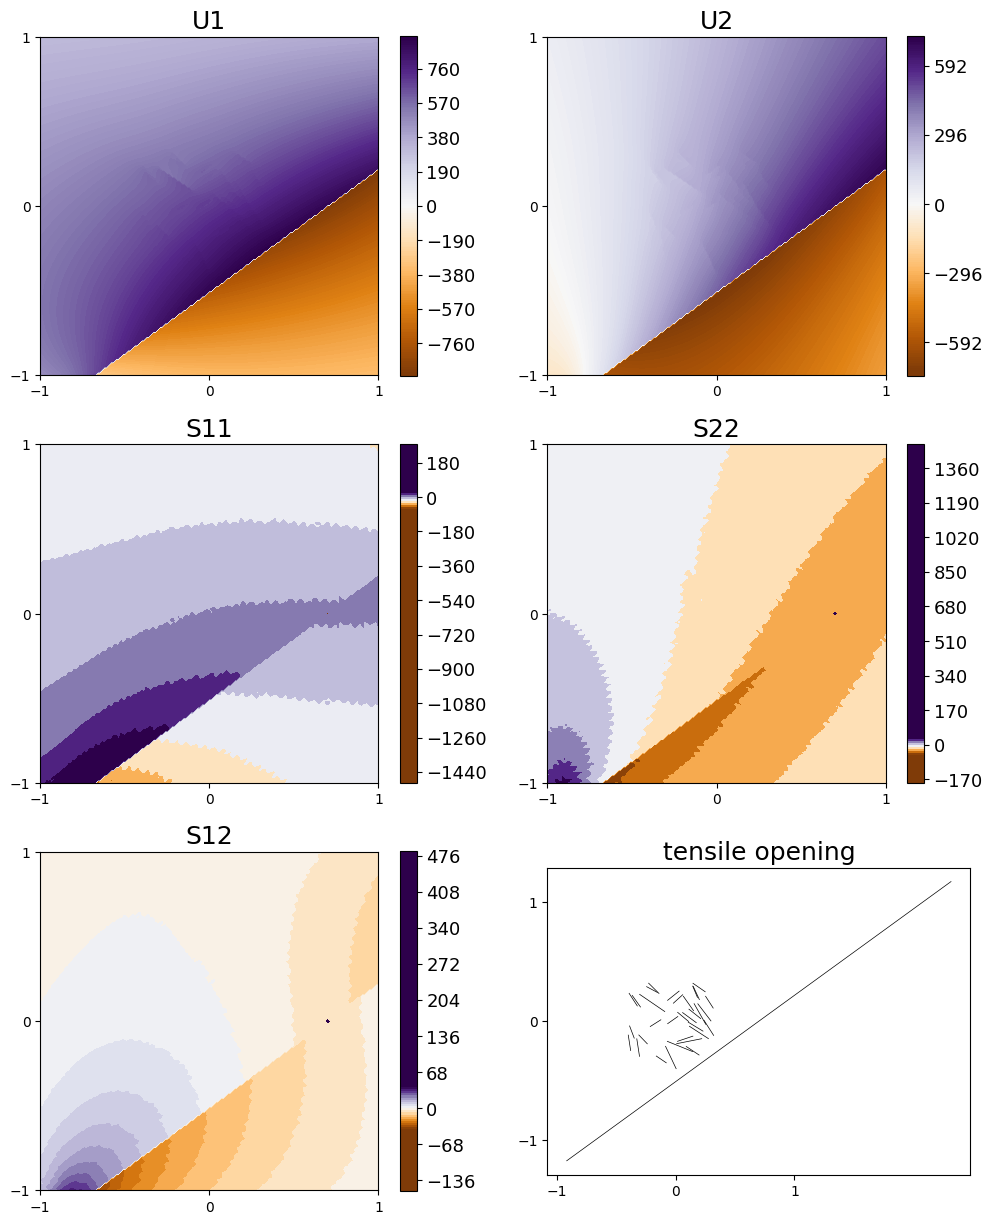

In [327]:
# Shear slip and tensile opening solver 
# define far field stress, friction coefficient, and fluid pressure
s11_inf  = -18  # - is compression, + tension
s22_inf  = -7
s12_inf  = 0
mu       = 0.2
pressure = 7

showUFarField = 0

# far fiel stress and displacement
a12 = s12_inf/2/Lame2
a21 = a12    
a22 = (s11_inf - (Lame1 + 2*Lame2)/Lame1*s22_inf)/(Lame1 - (Lame1 + 2*Lame2)**2/Lame1)
a11 = (s22_inf - (Lame1 + 2*Lame2)*a22)/Lame1

U1_inf = a11*X1_Domain + a12*X2_Domain
U2_inf = a21*X1_Domain + a22*X2_Domain

for j in range(n_fractures):
    fracture_slip    [j] = 0
    fracture_opening [j] = 0

# outer iteration to capture shearing or opening fracture because of interaction
for it_outer in range(10):
    # determine compressive and shear forces on fractures
    for j in range(n_fractures):
        n1 = -np.sin(fracture_alpha[j])
        n2 =  np.cos(fracture_alpha[j])
        t1 =  np.cos(fracture_alpha[j])
        t2 =  np.sin(fracture_alpha[j])

        f1 = (s11_inf*n1 + s12_inf*n2) 
        f2 = (s12_inf*n1 + s22_inf*n2)

        influence_t_inf  = f1*t1 + f2*t2       
        influence_c_inf  = f1*n1 + f2*n2 + pressure
        influence_t_inf *= fracture_length[j]   
        influence_c_inf *= fracture_length[j]   

        fracture_ft[j] = influence_t_inf
        fracture_fc[j] = influence_c_inf
        
        # no negative opening
        if fracture_opening[j] < -1e-10:
            fracture_opening[j] = 0

        if (fracture_fc[j] < epsilon and fracture_opening[j] > epsilon):
            fracture_opening[j] = 0

        for i in range(n_fractures):
            if(i!=j):
                fracture_ft[j] += fracture_slip[i]*influence_t[i,j]
                fracture_fc[j] += fracture_slip[i]*influence_c[i,j]
                fracture_ft[j] += fracture_opening[i]*influenceTO_t[i,j]
                fracture_fc[j] += fracture_opening[i]*influenceTO_c[i,j]
            else:
                sign = 1
                sign = -1*(fracture_slip[i] >= 0) + 1*(fracture_slip[i] < 0)
                
                fracture_ft[j] += fracture_slip[i]*influence_t[i,j]      
                fracture_fc[j] += sign*fracture_slip[i]*influence_c[i,j]      
                fracture_ft[j] += sign*fracture_opening[i]*influenceTO_t[i,j]
                fracture_fc[j] += fracture_opening[i]*influenceTO_c[i,j]

    # solve system to get slips (with Jacobi method)               
    for it in range(20):
        for j in range(n_fractures):
            if ((fracture_fc[j] > epsilon) or (-fracture_fc[j]*mu < abs(fracture_ft[j]))):
                n1 = -np.sin(fracture_alpha[j])
                n2 =  np.cos(fracture_alpha[j])
                t1 =  np.cos(fracture_alpha[j])
                t2 =  np.sin(fracture_alpha[j])

                influence_t_inf  = (s11_inf*n1 + s12_inf*n2)*t1 + (s12_inf*n1 + s22_inf*n2)*t2
                influence_t_inf *= fracture_length[j]   
                influence_c_inf  = (s11_inf*n1 + s12_inf*n2)*n1 + (s12_inf*n1 + s22_inf*n2)*n2 + pressure
                influence_c_inf *= fracture_length[j]   
                
                if (fracture_fc[j] > epsilon or fracture_opening[j]>epsilon):
                    #calculate slip
                    tmp = -influence_t_inf
            
                    for i in range(n_fractures):
                        if (i != j):
                            tmp -= fracture_slip[i]*influence_t[i,j]
                            tmp -= fracture_opening[i]*influenceTO_t[i,j] 
                            
                    tmp -= fracture_opening[j]*influenceTO_t[j,j]
                    fracture_slip[j] = tmp/(influence_t[j,j])

            
                    #calcualte Tensile Opening, sigma_n = p^f 
                    tmp = -influence_c_inf
                    
                    for i in range(n_fractures):
                        if (i != j):
                            tmp -= fracture_opening[i]*influenceTO_c[i,j]
                            tmp -= fracture_slip[i]*influence_c[i,j]
                    sign = -1*(fracture_slip[j]>=0) + 1*(fracture_slip[j]<0)
                    tmp -= sign*fracture_slip[j]*influence_c[j,j] 
                    fracture_opening[j] = tmp/influenceTO_c[j,j]       
                    
                else:  
                    # |tau| = tau_max, |tau|=mu(-sigma_n-p^f)
                    sign = 1*(fracture_ft[j]>epsilon) - 1*(fracture_ft[j]<-epsilon) 
                    if (sign==0): 
                        sign = 1
                   
                    tmp = -mu*influence_c_inf - sign*influence_t_inf 

                    for i in range(n_fractures):
                        if (i != j): 
                            tmp += fracture_slip[i]*(-mu*influence_c[i,j] - sign*influence_t[i,j]) 
                            tmp += fracture_opening[i]*(-mu*influenceTO_c[i,j] - sign*influenceTO_t[i,j]) 
                    
                    
                    fracture_slip[j] = tmp/(sign*influence_t[j,j] + mu*influence_c[j,j])

#check if converged; if forces are 0
if( max(abs(fracture_ft)+fracture_fc*mu) > 1e-7):
    print(" Warning. Shear force maybe not converged. Residual force: ",max(abs(fracture_ft)+fracture_fc*mu))

S11_Domain_sum = s11_inf
S22_Domain_sum = s22_inf
S12_Domain_sum = s12_inf
U1_Domain_sum  = a11*X1_Domain + a12*X2_Domain
U2_Domain_sum  = a21*X1_Domain + a22*X2_Domain
if (not showUFarField):
    U1_Domain_sum  *= 0
    U2_Domain_sum  *= 0


for i_fracture in range(n_fractures):
    U1_Domain_sum  += U1_Domain [i_fracture,:,:]*fracture_slip[i_fracture]
    U2_Domain_sum  += U2_Domain [i_fracture,:,:]*fracture_slip[i_fracture]

    S11_Domain_sum += S11_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
    S22_Domain_sum += S22_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
    S12_Domain_sum += S12_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
    
    U1_Domain_sum  += U1N_Domain [i_fracture,:,:]*fracture_opening[i_fracture]
    U2_Domain_sum  += U2N_Domain [i_fracture,:,:]*fracture_opening[i_fracture]

    S11_Domain_sum += S11N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]
    S22_Domain_sum += S22N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]
    S12_Domain_sum += S12N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]

#calculate mean stress
Smean_Domain_sum = (S11_Domain_sum+S22_Domain_sum)/2

fig  = plt.figure(figsize=(12, 15))
sf7  = fig.add_subplot(321)
sf8  = fig.add_subplot(322)
sf9  = fig.add_subplot(323)
sf10 = fig.add_subplot(324)
sf11 = fig.add_subplot(325)
sf12 = fig.add_subplot(326)

sf7 .axis('scaled')
sf8 .axis('scaled')
sf9 .axis('scaled')
sf10.axis('scaled')
sf11.axis('scaled')
sf12.axis('scaled')

font_size = 14

sf7 .clear()
sf8 .clear()
sf9 .clear()
sf10.clear()
sf11.clear()
sf12.clear()

sf7 .levels = np.linspace(-1, 1, 9)
sf8 .levels = np.linspace(-1, 1, 9)
sf9 .levels = np.linspace(-1, 1, 9)
sf10.levels = np.linspace(-1, 1, 9)
sf11.levels = np.linspace(-1, 1, 9)
sf12.levels = np.linspace(-1, 1, 9)

stress_plot_delta=40

cbar_max=max(abs(U1_Domain_sum.min()),abs(U1_Domain_sum.max())*1000) # in mm
#cbar_max= 70 #130
s7 = sf7 .contourf(X1_Domain,X2_Domain,U1_Domain_sum*1000                ,200,cmap='PuOr',vmin = -cbar_max, vmax = cbar_max-0) # plot U1             
cbar = plt.colorbar(s7)
cbar.ax.tick_params(labelsize=13) 
sf7.set_xticks([-1,0,1])
sf7.set_yticks([-1,0,1])
sf7.set_xlim([-1,1])
sf7.set_ylim([-1,1])

cbar_max=max(abs(U2_Domain_sum.min()),abs(U2_Domain_sum.max())*1000)
#cbar_max=50 # 90
s8 = sf8 .contourf(X1_Domain,X2_Domain,U2_Domain_sum*1000                ,200,cmap='PuOr',vmin=-cbar_max, vmax=cbar_max) # plot U2     
cbar = plt.colorbar(s8)
cbar.ax.tick_params(labelsize=13) 
cbar.ax.locator_params(nbins=5)
sf8.set_xticks([-1,0,1])
sf8.set_yticks([-1,0,1])
sf8.set_xlim([-1,1])
sf8.set_ylim([-1,1])

s9 = sf9 .contourf(X1_Domain,X2_Domain,S11_Domain_sum               ,200,cmap='PuOr',vmin=s11_inf-stress_plot_delta, vmax=s11_inf+stress_plot_delta) # plot S11             
cbar = plt.colorbar(s9)
cbar.ax.tick_params(labelsize=13) 
sf9.set_xticks([-1,0,1])
sf9.set_yticks([-1,0,1])
sf9.set_xlim([-1,1])
sf9.set_ylim([-1,1])

s10 = sf10.contourf(X1_Domain,X2_Domain,S22_Domain_sum               ,200,cmap='PuOr',vmin=s22_inf-stress_plot_delta, vmax=s22_inf+stress_plot_delta) # plot S22  
cbar = plt.colorbar(s10)
cbar.ax.tick_params(labelsize=13) 
sf10.set_xticks([-1,0,1])
sf10.set_yticks([-1,0,1])
sf10.set_xlim([-1,1])
sf10.set_ylim([-1,1])

s11 = sf11.contourf(X1_Domain,X2_Domain,S12_Domain_sum              ,200,cmap='PuOr',vmin=s12_inf-stress_plot_delta, vmax=s12_inf+stress_plot_delta) # plot S12 
cbar=plt.colorbar(s11)
cbar.ax.tick_params(labelsize=13) 
sf11.set_xticks([-1,0,1])
sf11.set_yticks([-1,0,1])
sf11.set_xlim([-1,1])
sf11.set_ylim([-1,1])

# plot dilated fractures  
for j in range(n_fractures):
    dx1 = fracture_length[j]*np.cos(fracture_alpha[j])
    dx2 = fracture_length[j]*np.sin(fracture_alpha[j])
    x1b = fracture_x1[j] - dx1/2
    x1e = fracture_x1[j] + dx1/2
    x2b = fracture_x2[j] - dx2/2
    x2e = fracture_x2[j] + dx2/2
    if (fracture_opening[j]>epsilon): 
        sf12.plot([x1b,x1e],[x2b,x2e],"black",linewidth=2+fracture_opening[j]) 
    else:
        sf12.plot([x1b,x1e],[x2b,x2e],"black",linewidth=0.5) 
sf12.set_xticks([-1,0,1])
sf12.set_yticks([-1,0,1])

# plot settings
sf7 .set_title("U1"             , fontsize=18)
sf8 .set_title("U2"             , fontsize=18)
sf9 .set_title("S11"            , fontsize=18)
sf10.set_title("S22"            , fontsize=18)
sf11.set_title("S12"            , fontsize=18)
sf12.set_title("tensile opening", fontsize=18)


# plot
dsp.display(plt.gcf())
dsp.clear_output(wait=True)
           

In [ ]:
def animateSolution(s11_inf,s22_inf,s12_inf,mu,pressure,showUFarField):

    # far fiel stress and displacement
    a12 = s12_inf/2/Lame2
    a21 = a12    
    a22 = (s11_inf - (Lame1 + 2*Lame2)/Lame1*s22_inf)/(Lame1 - (Lame1 + 2*Lame2)**2/Lame1)
    a11 = (s22_inf - (Lame1 + 2*Lame2)*a22)/Lame1
    
    U1_inf = a11*X1_Domain + a12*X2_Domain
    U2_inf = a21*X1_Domain + a22*X2_Domain
    
    
    for j in range(n_fractures):
        fracture_slip    [j] = 0
        fracture_opening [j] = 0
    
    for it_outer in range(10):
        # determine compressive and shear forces on fractures
        for j in range(n_fractures):
            n1 = -np.sin(fracture_alpha[j]) 
            n2 =  np.cos(fracture_alpha[j])
            t1 =  np.cos(fracture_alpha[j])
            t2 =  np.sin(fracture_alpha[j])
    
            f1 = (s11_inf*n1 + s12_inf*n2) 
            f2 = (s12_inf*n1 + s22_inf*n2)
    
            influence_t_inf  = f1*t1 + f2*t2        
            influence_c_inf  = f1*n1 + f2*n2 + pressure
            influence_t_inf *= fracture_length[j]   
            influence_c_inf *= fracture_length[j]   
    
            fracture_ft[j] = influence_t_inf
            fracture_fc[j] = influence_c_inf
            
            # no negative opening
            if fracture_opening[j] < -1e-10:
                fracture_opening[j] = 0

            if (fracture_fc[j] < epsilon and fracture_opening[j] > epsilon):
                fracture_opening[j] = 0
    
            for i in range(n_fractures):
                if(i!=j):
                    fracture_ft[j] += fracture_slip[i]*influence_t[i,j]
                    fracture_fc[j] += fracture_slip[i]*influence_c[i,j]
                    fracture_ft[j] += fracture_opening[i]*influenceTO_t[i,j]
                    fracture_fc[j] += fracture_opening[i]*influenceTO_c[i,j]
                else:
                    sign = 1
                    sign = -1*(fracture_slip[i] >= 0) + 1*(fracture_slip[i] < 0)
                    
                    fracture_ft[j] += fracture_slip[i]*influence_t[i,j]      
                    fracture_fc[j] += sign*fracture_slip[i]*influence_c[i,j] 
                    fracture_ft[j] += sign*fracture_opening[i]*influenceTO_t[i,j] 
                    fracture_fc[j] += fracture_opening[i]*influenceTO_c[i,j]
    
        # solve system to get slips (with Jacobi method)               
        for it in range(20):
            for j in range(n_fractures):
                if ((fracture_fc[j] > epsilon) or (-fracture_fc[j]*mu < abs(fracture_ft[j]))):
                    n1 = -np.sin(fracture_alpha[j])
                    n2 =  np.cos(fracture_alpha[j])
                    t1 =  np.cos(fracture_alpha[j])
                    t2 =  np.sin(fracture_alpha[j])
    
                    influence_t_inf  = (s11_inf*n1 + s12_inf*n2)*t1 + (s12_inf*n1 + s22_inf*n2)*t2
                    influence_t_inf *= fracture_length[j]   
                    influence_c_inf  = (s11_inf*n1 + s12_inf*n2)*n1 + (s12_inf*n1 + s22_inf*n2)*n2 + pressure
                    influence_c_inf *= fracture_length[j]   

                    
                    if (fracture_fc[j] > epsilon or fracture_opening[j] > epsilon):
                        #calculate slip
                        tmp = -influence_t_inf
    
                        for i in range(n_fractures):
                            if (i != j):
                                tmp -= fracture_slip[i]*influence_t[i,j]
                                tmp -= fracture_opening[i]*influenceTO_t[i,j] 
                        
                        tmp -= fracture_opening[j]*influenceTO_t[j,j] 
                        fracture_slip[j] = tmp/(influence_t[j,j])
    
                        
                        #calcualte Tensile Opening, sigma_n = p^f 
                        tmp = -influence_c_inf
                        
                        for i in range(n_fractures):
                            if (i != j):
                                tmp -= fracture_opening[i]*influenceTO_c[i,j]
                                tmp -= fracture_slip[i]*influence_c[i,j]
                        sign = -1*(fracture_slip[j]>=0) + 1*(fracture_slip[j]<0)
                        tmp -= sign*fracture_slip[j]*influence_c[j,j] 
                        fracture_opening[j] = tmp/influenceTO_c[j,j]       
                        
                    else:  
                        # |tau| = tau_max, |tau|=mu(-sigma_n-p^f)
                        sign = 1*(fracture_ft[j]>epsilon) - 1*(fracture_ft[j]<-epsilon) 
                        if (sign==0): 
                            sign = 1
                       
                        tmp = -mu*influence_c_inf - sign*influence_t_inf 
    
                        for i in range(n_fractures):
                            if (i != j): 
                                tmp += fracture_slip[i]*(-mu*influence_c[i,j] - sign*influence_t[i,j]) 
                                tmp += fracture_opening[i]*(-mu*influenceTO_c[i,j] - sign*influenceTO_t[i,j]) 
                                           
                        fracture_slip[j] = tmp/(sign*influence_t[j,j] + mu*influence_c[j,j])

                
                
    #check if shear force converged
    if( max(abs(fracture_ft)+fracture_fc*mu) > 1e-7):
        print(" Warning. Shear force maybe not converged. Residual force: ",max(abs(fracture_ft)+fracture_fc*mu))

    
    S11_Domain_sum = s11_inf
    S22_Domain_sum = s22_inf
    S12_Domain_sum = s12_inf
    U1_Domain_sum  = a11*X1_Domain + a12*X2_Domain
    U2_Domain_sum  = a21*X1_Domain + a22*X2_Domain
    if (not showUFarField):
        U1_Domain_sum  *= 0
        U2_Domain_sum  *= 0
    
    
    for i_fracture in range(n_fractures):
        U1_Domain_sum  += U1_Domain [i_fracture,:,:]*fracture_slip[i_fracture]
        U2_Domain_sum  += U2_Domain [i_fracture,:,:]*fracture_slip[i_fracture]
    
        S11_Domain_sum += S11_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
        S22_Domain_sum += S22_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
        S12_Domain_sum += S12_Domain[i_fracture,:,:]*fracture_slip[i_fracture]
        
        U1_Domain_sum  += U1N_Domain [i_fracture,:,:]*fracture_opening[i_fracture]
        U2_Domain_sum  += U2N_Domain [i_fracture,:,:]*fracture_opening[i_fracture]
    
        S11_Domain_sum += S11N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]
        S22_Domain_sum += S22N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]
        S12_Domain_sum += S12N_Domain[i_fracture,:,:]*fracture_opening[i_fracture]
    
    #calculate mean stress
    Smean_Domain_sum = (S11_Domain_sum+S22_Domain_sum)/2
    
    fig  = plt.figure(figsize=(12, 15))
    sf7  = fig.add_subplot(321)
    sf8  = fig.add_subplot(322)
    sf9  = fig.add_subplot(323)
    sf10 = fig.add_subplot(324)
    sf11 = fig.add_subplot(325)
    sf12 = fig.add_subplot(326)
    
    sf7 .axis('scaled')
    sf8 .axis('scaled')
    sf9 .axis('scaled')
    sf10.axis('scaled')
    sf11.axis('scaled')
    sf12.axis('scaled')
    
    font_size = 14
    
    sf7 .clear()
    sf8 .clear()
    sf9 .clear()
    sf10.clear()
    sf11.clear()
    sf12.clear()
    
    sf7 .levels = np.linspace(-1, 1, 9)
    sf8 .levels = np.linspace(-1, 1, 9)
    sf9 .levels = np.linspace(-1, 1, 9)
    sf10.levels = np.linspace(-1, 1, 9)
    sf11.levels = np.linspace(-1, 1, 9)
    sf12.levels = np.linspace(-1, 1, 9)
    
    stress_plot_delta=2
    
    cbar_max=max(abs(U1_Domain_sum.min()),abs(U1_Domain_sum.max())*1000)# in mm
    cbar_max= 70
    s7 = sf7 .contourf(X1_Domain,X2_Domain,U1_Domain_sum*1000                ,200,cmap='PuOr',vmin = -cbar_max, vmax = cbar_max-0) # plot U1             
    cbar = plt.colorbar(s7)
    cbar.ax.tick_params(labelsize=13) 
    sf7.set_xticks([-1,0,1])
    sf7.set_yticks([-1,0,1])
    sf7.set_xlim([-1,1])
    sf7.set_ylim([-1,1])

    cbar_max=max(abs(U2_Domain_sum.min()),abs(U2_Domain_sum.max())*1000)
    cbar_max= 50
    s8 = sf8 .contourf(X1_Domain,X2_Domain,U2_Domain_sum*1000                ,200,cmap='PuOr',vmin=-cbar_max, vmax=cbar_max) # plot U2     
    cbar = plt.colorbar(s8)
    cbar.ax.tick_params(labelsize=13) 
    cbar.ax.locator_params(nbins=5)
    sf8.set_xticks([-1,0,1])
    sf8.set_yticks([-1,0,1])
    sf8.set_xlim([-1,1])
    sf8.set_ylim([-1,1])
    #sf8.contour(s8,levels=[0.01, 0.01],colors='black',linewidths=0.5)
    
    s9 = sf9 .contourf(X1_Domain,X2_Domain,S11_Domain_sum               ,200,cmap='PuOr',vmin=s11_inf-stress_plot_delta, vmax=s11_inf+stress_plot_delta) # plot S11             
    cbar = plt.colorbar(s9)
    cbar.ax.tick_params(labelsize=13) 
    sf9.set_xticks([-1,0,1])
    sf9.set_yticks([-1,0,1])
    sf9.set_xlim([-1,1])
    sf9.set_ylim([-1,1])

    s10 = sf10.contourf(X1_Domain,X2_Domain,S22_Domain_sum               ,200,cmap='PuOr',vmin=s22_inf-stress_plot_delta, vmax=s22_inf+stress_plot_delta) # plot S22  
    cbar = plt.colorbar(s10)
    cbar.ax.tick_params(labelsize=13) 
    sf10.set_xticks([-1,0,1])
    sf10.set_yticks([-1,0,1])
    sf10.set_xlim([-1,1])
    sf10.set_ylim([-1,1])

    s11 = sf11.contourf(X1_Domain,X2_Domain,Smean_Domain_sum-(s11_inf+s22_inf)/2               ,200,cmap='PuOr',vmin=-2, vmax=2) # plot Smean   #vmin=s12_inf-stress_plot_delta, vmax=s12_inf+stress_plot_delta
    cbar=plt.colorbar(s11)
    cbar.ax.tick_params(labelsize=13) 
    sf11.set_xticks([-1,0,1])
    sf11.set_yticks([-1,0,1])
    sf11.set_xlim([-1,1])
    sf11.set_ylim([-1,1])

    for j in range(n_fractures):
        dx1 = fracture_length[j]*np.cos(fracture_alpha[j])
        dx2 = fracture_length[j]*np.sin(fracture_alpha[j])
        x1b = fracture_x1[j] - dx1/2
        x1e = fracture_x1[j] + dx1/2
        x2b = fracture_x2[j] - dx2/2
        x2e = fracture_x2[j] + dx2/2
        if (fracture_opening[j]>epsilon): 
            sf12.plot([x1b,x1e],[x2b,x2e],"black",linewidth=2+fracture_opening[j]) 
        else:
            sf12.plot([x1b,x1e],[x2b,x2e],"black",linewidth=0.5) 
    sf12.set_xticks([-1,0,1])
    sf12.set_yticks([-1,0,1])
    
    # plot settings
    sf7 .set_title("Ux"             , fontsize=18)
    sf8 .set_title("Uy"             , fontsize=18)
    sf9 .set_title("Sxx"            , fontsize=18)
    sf10.set_title("Syy"            , fontsize=18)
    sf11.set_title("Smean"            , fontsize=18)
    sf12.set_title("tensile opening", fontsize=18)
    
    
    # plot
    dsp.display(plt.gcf())
    dsp.clear_output(wait=True)

In [264]:
for j in range(n_fractures):
    fracture_slip    [j] = 0
    fracture_opening [j] = 0


In [330]:
interact(animateSolution, 
         s11_inf  = (-20,0,2),
         s22_inf  = (-20,0,1), 
         s12_inf  = (-1,1,0.1),
         mu       = (0,1,0.1),
         pressure = (0,15,1),
         showUFarField=False); 

interactive(children=(IntSlider(value=-10, description='s11_inf', max=0, min=-20, step=2), IntSlider(value=-10…

In [ ]:
print("slip = ",fracture_slip)  # slip profile has yaxis value of 0.5. Total slip is 2*fracture_slip*0.5
print("opening = ",fracture_opening) 



slip =  [-1.64227346e-02 -6.31108792e-03 -6.87798248e-04 -2.77581214e-02
 -3.74902512e-02 -1.53832313e-02 -5.07065640e-03  2.11740478e-02
  3.16186024e-02 -3.06571049e-02 -3.28150422e-02 -2.42323227e-02
 -2.18540266e-02 -1.60960519e-02 -1.44114733e-02 -2.53544382e-02
 -7.74007510e-02  2.67006184e-02  2.37494443e-02 -1.69021048e-02
 -1.37152896e-02 -7.55138733e-03 -2.93860970e-03  8.30667109e-03
  1.51665878e-03 -2.60907191e-02 -2.28923885e-02  1.62354360e-03
 -2.74854692e-02 -4.32376478e-03 -7.92092456e-03 -1.11765270e-02
  2.24580055e+00]
opening =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
fracture_fc =  [ -0.73148457  -0.88948837  -0.75348303  -0.54971543  -0.56703665
  -0.32515708  -0.89182861  -0.40618778  -0.41787862  -0.43636474
  -0.5412748   -0.90944318  -1.19176886  -0.55075251  -0.54780891
  -0.41947512  -0.62190167  -0.37257181  -0.39384929  -0.83211049
  -0.61899576  -0.83299917  -0.71790459  -0.44667472  -0.70533